In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
x = pd.read_csv('https://github.com/koroteevmv/ML_course/raw/refs/heads/main/ML1.2%20multivariate/data/0_x.csv',
                header=None)
y = pd.read_csv('https://github.com/koroteevmv/ML_course/raw/refs/heads/main/ML1.2%20multivariate/data/0_y.csv',
                header=None)

In [3]:
x.head(), y.head()

(          0         1         2         3         4
 0  0.071841  0.855352 -0.305597  0.028253  1.826895
 1  0.139521 -0.423507  0.461059 -0.447400 -0.034988
 2  1.626311 -0.257622 -0.697520  1.413219  1.086292
 3 -1.183233 -0.826343  0.073047 -0.639690 -0.503273
 4 -0.783365 -0.861232  0.951448 -0.117306  0.680597,
             0
 0   63.320498
 1  -23.426394
 2   11.982771
 3 -102.883304
 4  -49.373475)

In [4]:
x.shape, y.shape

((387, 5), (387, 1))

In [5]:
binary0 = LinearRegression()

In [6]:
binary0.fit(x[[0]], y)

LinearRegression()

In [7]:
binary0.coef_, binary0.intercept_

(array([[22.78111342]]), array([-4.05666473]))

In [8]:
y_pred = binary0.predict(x[[0]])
y_pred

array([[-2.42004238e+00],
       [-8.78210657e-01],
       [ 3.29925173e+01],
       [-3.10120198e+01],
       [-2.19025875e+01],
       [ 6.60489450e+01],
       [ 1.53292018e+00],
       [-9.48419200e+00],
       [-2.88367465e-01],
       [-4.69952278e+01],
       [-4.09231806e+01],
       [-2.70194581e+01],
       [ 1.17518386e+01],
       [-7.03559131e-02],
       [ 1.89831172e+01],
       [-1.16383540e+01],
       [-8.74458735e+00],
       [-4.09081352e+01],
       [-3.96006351e+01],
       [-8.11923054e+00],
       [ 1.70292960e+01],
       [-1.25041007e+00],
       [ 1.62900230e+01],
       [ 3.28798224e-01],
       [ 1.28098294e+00],
       [ 2.43481882e+01],
       [-3.11598811e+00],
       [ 6.01712725e+00],
       [ 2.86931625e+00],
       [ 1.17934534e+01],
       [ 2.87601089e+01],
       [ 4.68571901e+01],
       [ 1.33428473e+01],
       [ 1.28246961e+01],
       [-2.87904472e+01],
       [ 5.33892874e+00],
       [ 3.29446046e+00],
       [ 1.00257106e+01],
       [-5.9

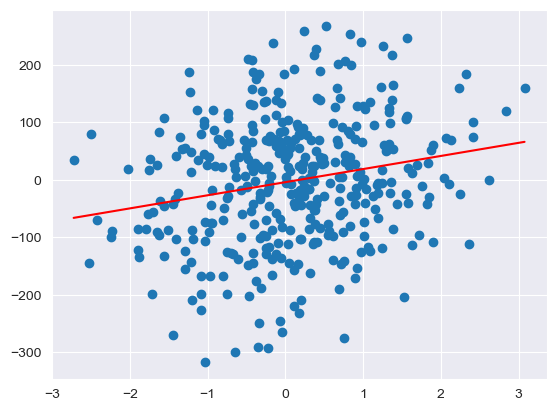

In [9]:
plt.scatter(x[0], y)

xx = np.linspace(x[0].min(), x[0].max(), 100).reshape((-1, 1))
plt.plot(xx, binary0.predict(xx), c='r')

In [10]:
binary0.score(x[[0]], y)

0.04364336234689348

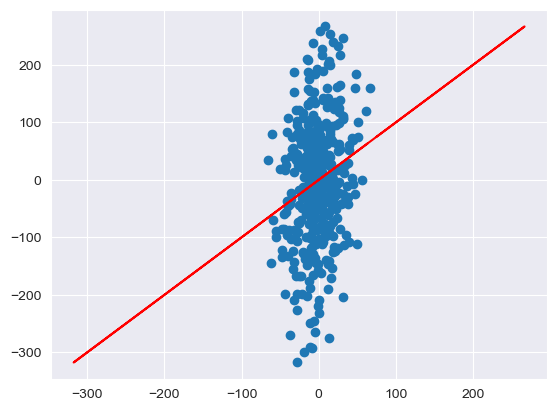

In [11]:
plt.scatter(y_pred, y)
plt.plot(y, y, c='r')

In [12]:
for i in range(5):
    binary = LinearRegression().fit(x[[i]], y)
    print(i, binary.score(x[[i]], y))

0 0.04364336234689348
1 0.7699743283650629
2 0.18794528514998887
3 0.047470345664983093
4 0.00017176151145947838


In [13]:
multiple = LinearRegression().fit(x, y)
print(f"R^2: {multiple.score(x, y)}")

R^2: 0.9922198026415868


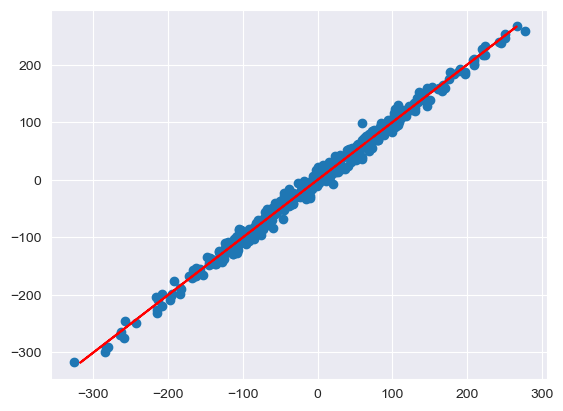

In [14]:
y_pred = multiple.predict(x)
plt.scatter(y_pred, y)
plt.plot(y, y, c='r')

In [15]:
multiple.coef_, multiple.intercept_

(array([[15.79537523, 93.21521093, 37.19410687, 31.19129121, -0.23773114]]),
 array([0.56498354]))

# 1. Самостоятельно постройте парные регрессии от каждого атрибута с целевой переменной.

Признак 0: R^2 = 0.0436


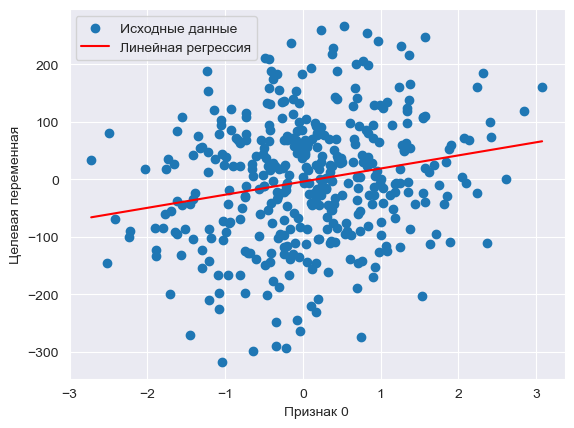

Признак 1: R^2 = 0.7700


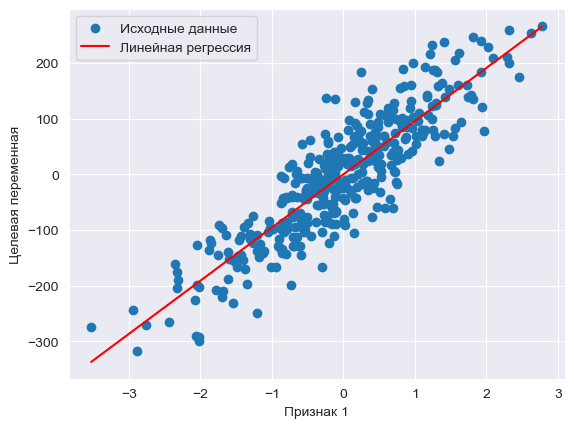

Признак 2: R^2 = 0.1879


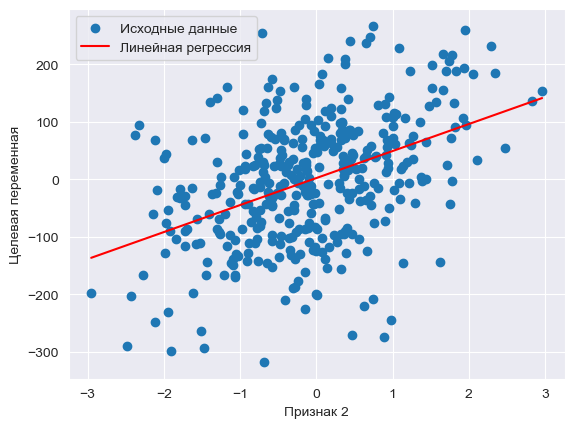

Признак 3: R^2 = 0.0475


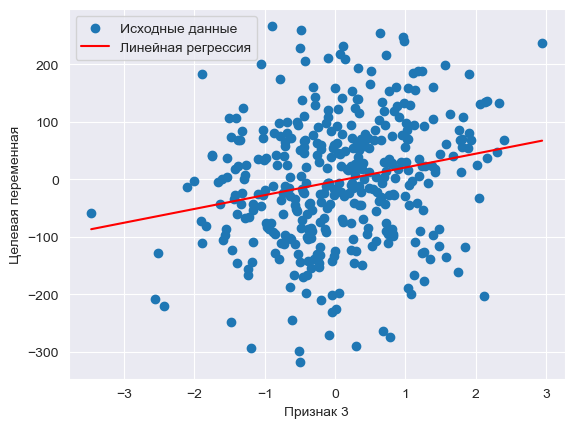

Признак 4: R^2 = 0.0002


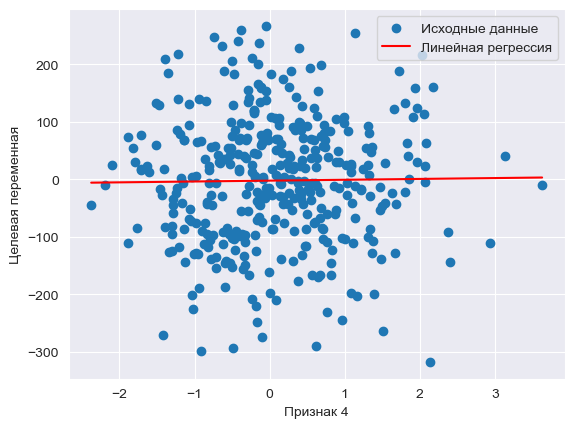

In [16]:
for i in range(x.shape[1]):
    model = LinearRegression().fit(x[[i]], y)
    score = model.score(x[[i]], y)
    print(f"Признак {i}: R^2 = {score:.4f}")

    # График
    plt.figure()
    plt.scatter(x[i], y, label='Исходные данные')
    xx = np.linspace(x[i].min(), x[i].max(), 100).reshape(-1, 1)
    plt.plot(xx, model.predict(xx), color='r', label='Линейная регрессия')
    plt.xlabel(f'Признак {i}')
    plt.ylabel('Целевая переменная')
    plt.legend()
    plt.show()

# 3. Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. Сделайте вывод о значимости регрессии.

In [17]:
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

for i in range(x.shape[1]):
    for degree in [2, 3, 10]:
        poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        poly.fit(x[[i]], y)
        y_pred = poly.predict(x[[i]])
        score = r2_score(y, y_pred)
        print(f"Полиномиальная регрессия {degree}-й степени для признака {i}: R^2 = {score:.4f}")


for degree in [2, 3, 10]:
    poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly.fit(y, x.mean(axis=1).values.reshape(-1, 1))
    y_pred = poly.predict(y)
    score = r2_score(x.mean(axis=1).values.reshape(-1, 1), y_pred)
    print(f"Полиномиальная регрессия {degree}-й степени для целевой переменной: R^2 = {score:.4f}")

Полиномиальная регрессия 2-й степени для признака 0: R^2 = 0.0437
Полиномиальная регрессия 3-й степени для признака 0: R^2 = 0.0438
Полиномиальная регрессия 10-й степени для признака 0: R^2 = 0.0504
Полиномиальная регрессия 2-й степени для признака 1: R^2 = 0.7700
Полиномиальная регрессия 3-й степени для признака 1: R^2 = 0.7711
Полиномиальная регрессия 10-й степени для признака 1: R^2 = 0.7727
Полиномиальная регрессия 2-й степени для признака 2: R^2 = 0.1900
Полиномиальная регрессия 3-й степени для признака 2: R^2 = 0.1928
Полиномиальная регрессия 10-й степени для признака 2: R^2 = 0.2044
Полиномиальная регрессия 2-й степени для признака 3: R^2 = 0.0479
Полиномиальная регрессия 3-й степени для признака 3: R^2 = 0.0503
Полиномиальная регрессия 10-й степени для признака 3: R^2 = 0.0727
Полиномиальная регрессия 2-й степени для признака 4: R^2 = 0.0010
Полиномиальная регрессия 3-й степени для признака 4: R^2 = 0.0011
Полиномиальная регрессия 10-й степени для признака 4: R^2 = 0.0451
Полин

Признак 1 — самый значимый.
Признак 2 умеренно значим.
Остальные признаки имеют слабую зависимость.

Полиномиальные модели высокого порядка не дают значительного прироста точности, а в случае целевой переменной вызывают переобучение.

Оптимальный вариант — линейная регрессия или полином 2-й, максимум 3-й степени для признаков 1 и 2.